In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
plt.style.use('default')
plt.style.use('default')
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams['font.size'] = 18

In [35]:
Cluster_ID=['NGC 362','NGC 3201','NGC 4833','NGC 5139','NGC 6121','NGC 6218','NGC 6254','NGC 6362','NGC 6397','NGC 6656','NGC 6752','NGC 6809','NGC 6838']

In [57]:
mu_calculated=np.array([14.72,13.10,13.33,13.65,11.40,13.31,13.26,13.98,11.81,12.82,13.69,13.83,12.58])

In [58]:
mu_err=np.array([1.96,1.71,1.92,1.47,1.61,1.81,1.66,1.99,1.67,1.44,1.62,1.73,1.79])

In [59]:
mu_actual=np.array([14.83,14.20,15.08,13.94,12.82,14.01,14.08,14.68,12.37,13.60,13.13,13.89,13.80])

In [111]:
Red = np.array([0.05,0.24,0.32,0.12,0.35,0.19,0.28,0.09,0.18,0.34,0.04,0.08,0.25])

In [117]:
Z = np.array([-1.26,-1.59,-1.85,-1.53,-1.16,-1.37,-1.56,-0.99,-2.02,-1.70,-1.54,-1.94,-0.78])

In [62]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b


In [79]:
c,m=best_fit(mu_actual,mu_calculated)

best fit line:
y = 1.53 + 0.84x


In [80]:
print("%1.2f"%m)

0.84


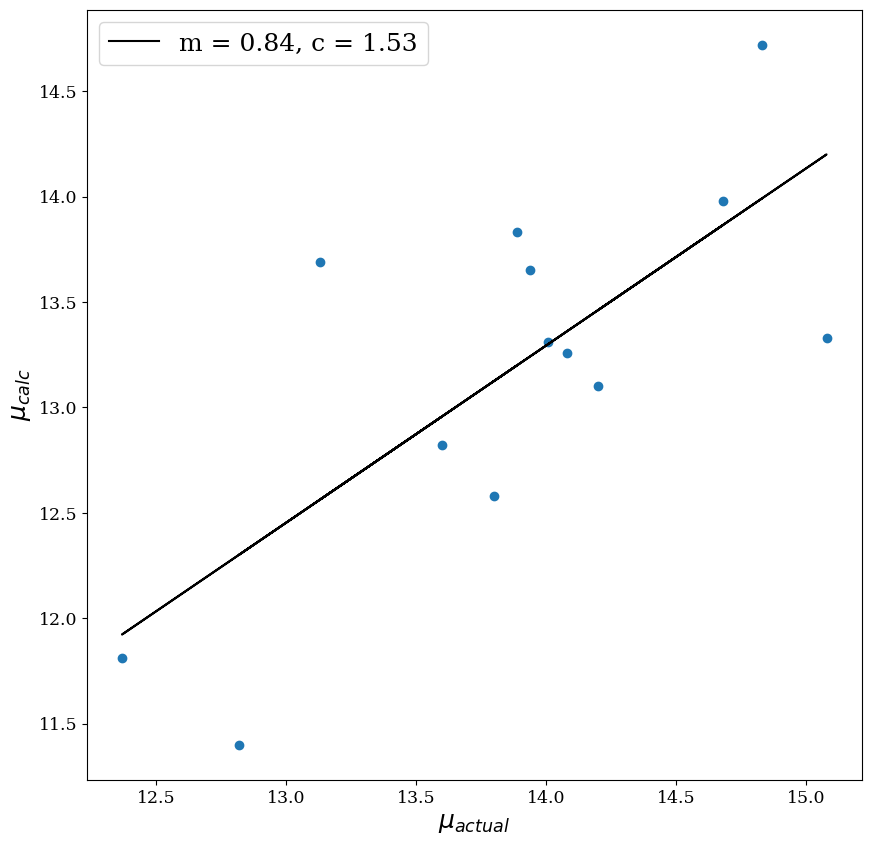

In [89]:
plt.figure(figsize=[10,10])
plt.scatter(mu_actual,mu_calculated)
plt.plot(mu_actual,m*mu_actual+ c,"k-",label="m = %3.2f, c = %3.2f"%(m,c))
#plt.plot(mu_actual,1*mu_actual,"r--",label="m = %3.2f, c = %3.2f"%(m,c))
plt.legend()
plt.xlabel("$\mu_{actual}$")
plt.ylabel("$\mu_{calc}$")
plt.savefig("Figures/muvmureal.pdf")

In [100]:
mean_error = np.mean(mu_actual-mu_calculated)

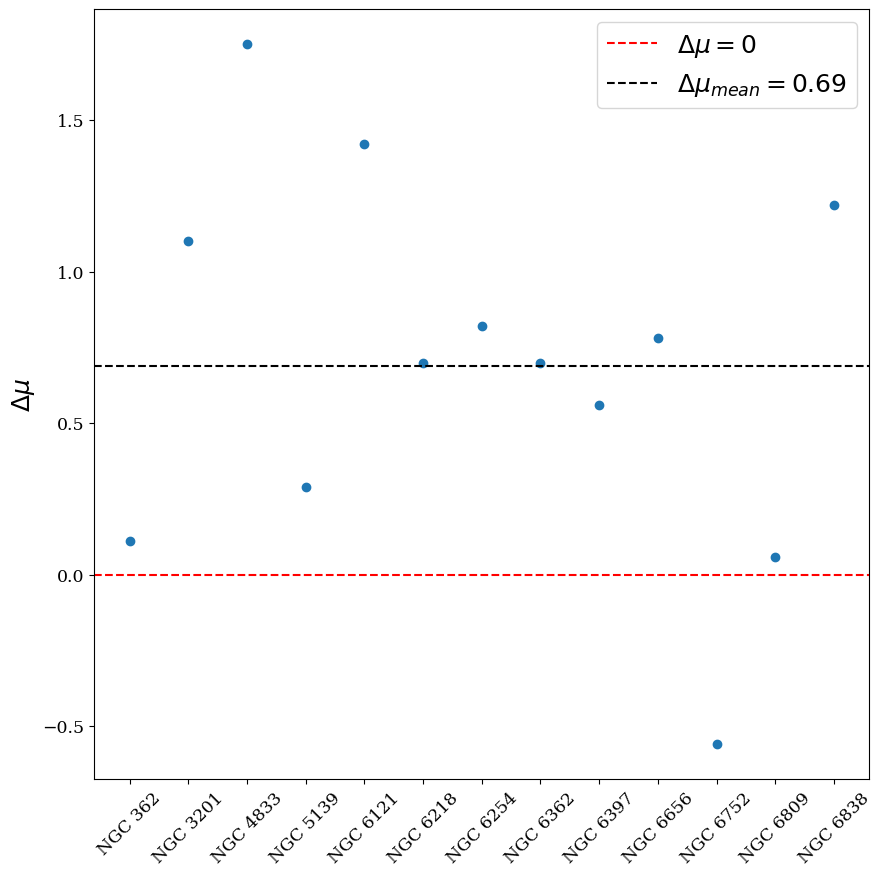

In [107]:
plt.figure(figsize=[10,10])
plt.scatter(Cluster_ID,mu_actual-mu_calculated)
plt.xticks(rotation = 45)
plt.axhline(0,color="red",linestyle="--",label="$\Delta \mu = 0$")
plt.axhline(mean_error,color="black",linestyle="--",label="$\Delta \mu_{mean} = %3.2f$"%(mean_error))
plt.ylabel("$\Delta \mu$")
plt.legend()
plt.savefig("Figures/deltamu.pdf")

In [13]:
mu_calculated=np.array(mu_calculated)
mu_actual=np.array(mu_actual)
Red=np.array(Red)
Z=np.array(Z)
delta_mu = mu_calculated-mu_actual

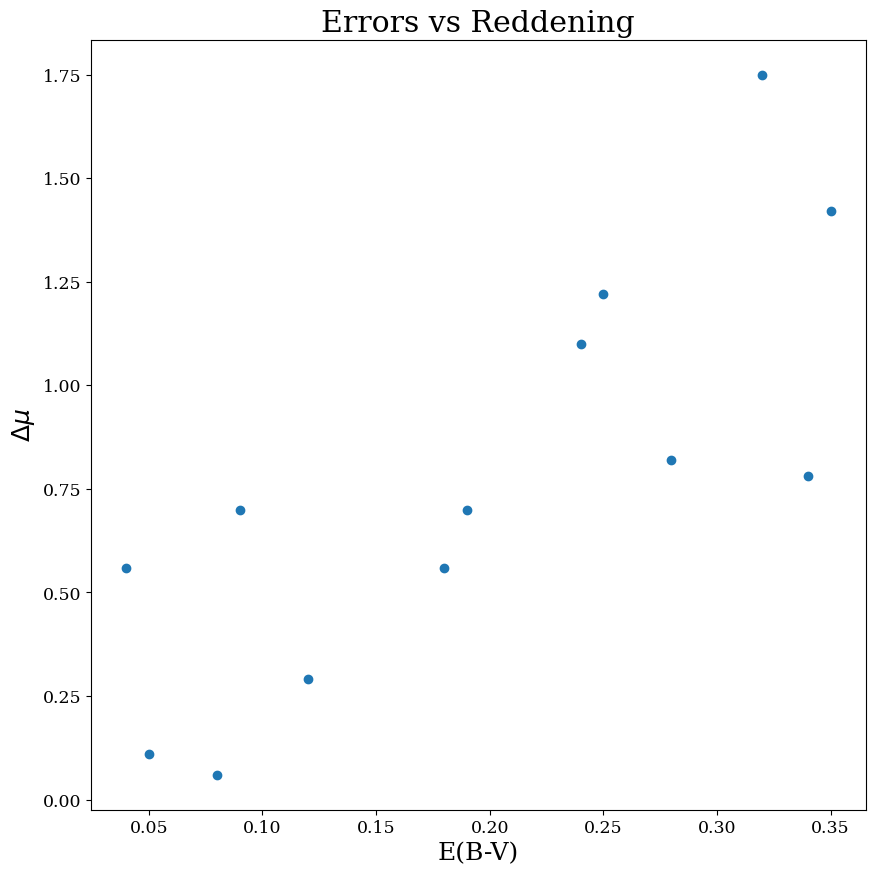

In [118]:
plt.figure(figsize=[10,10])
plt.scatter(Red,np.abs(delta_mu))
plt.xlabel("E(B-V)")
plt.ylabel("$\Delta \mu$")
plt.title("Errors vs Reddening")
plt.savefig("Figures/reddening.pdf")

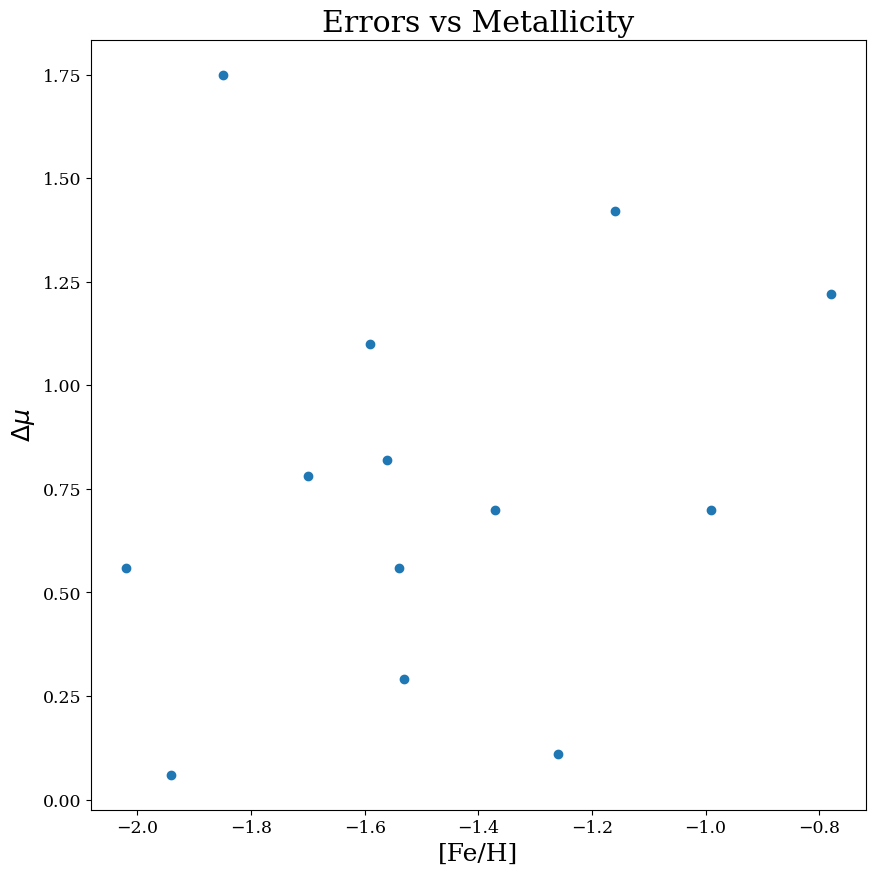

In [123]:
plt.figure(figsize=[10,10])
plt.scatter(Z,np.abs(delta_mu))
plt.xlabel("[Fe/H]")
plt.ylabel("$\Delta \mu$")
plt.title("Errors vs Metallicity")
plt.savefig("Figures/Metallicityverror.pdf")